<a href="https://colab.research.google.com/github/lakshit2808/Machine-Learning-Notes/blob/master/ML_Models/Regression/Simple_Regression/simple_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Regression


<img src='https://github.com/lakshit2808/Machine-Learning-Notes/blob/master/Resources/Images/LinearReg.jpg?raw=true' height = '800' width='400'>

## 1. Importing Packages



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Reading Data

In [6]:

df = pd.read_csv('/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 3. Data Explortion

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
mdf = df[['ENGINESIZE' ,'CYLINDERS' , 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
mdf.head(6)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


## 4. Data Visualizatoin

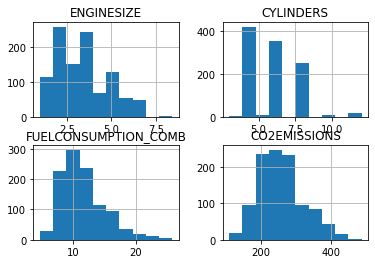

In [ ]:
mdf.hist()
plt.show()

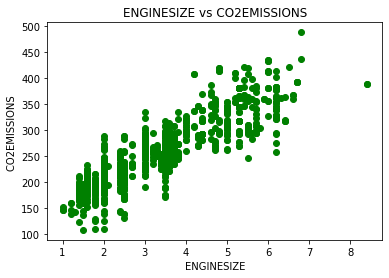

In [ ]:
# ENGINESIZE vs CO2EMISSIONS

plt.scatter(mdf.ENGINESIZE , mdf.CO2EMISSIONS , color='green')
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS ')
plt.show()

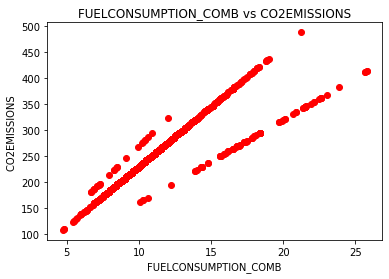

In [ ]:
# FUELCONSUMPTION_COMB vs CO2EMISSIONS
plt.scatter(mdf.FUELCONSUMPTION_COMB , mdf.CO2EMISSIONS , color='red')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS ')
plt.show()

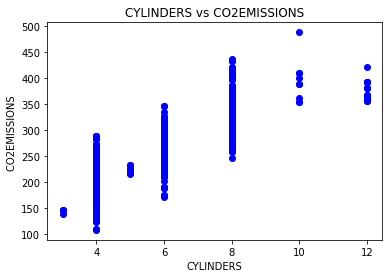

In [ ]:
# CYLINDERS vs CO2EMISSIONS
plt.scatter(mdf.CYLINDERS , mdf.CO2EMISSIONS , color='blue')
plt.title('CYLINDERS vs CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS ')
plt.show()

## 5. Train/Test Split

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = mdf[msk]
test = mdf[msk]


## 6. Simple Regression Model

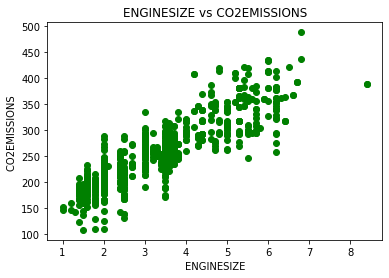

In [ ]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='green')
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS ')
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x , train_y)
print('Slope: {}'.format(regr.coef_[0][0]))
print('Intercept {}'.format(regr.intercept_[0]))

Slope: 39.325368270342835
Intercept 124.58155385351395


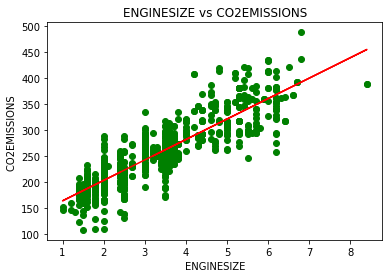

In [ ]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='green')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0] , '-r')
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS ')
plt.show()

## 7. Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

# ERRORS

print('Mean Absolute Error: {}'.format(np.mean(test_y_ - test_y)))
print('Mean Square Error: {}'.format(np.mean((test_y_ - test_y)**2)))
print('R2 Score: {}'.format(r2_score(test_y , test_y_)))

Mean Absolute Error: -1.0496266792043686e-14
Mean Square Error: 973.5096581801105
R2 Score: 0.7588594852300422
